<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [15]:
# insert code here
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [9]:
# insert code here
# The diabetes dataset
diabetes = load_diabetes()

In [17]:
# Convert to a DataFrame for easier handling
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)


In [19]:
# Add the target variable to the DataFrame
diabetes_df['target'] = diabetes.target

In [21]:
# Display the first few rows of the dataset
print(diabetes_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


### Prepare input data

In [23]:
# insert code herec# Features
# Features
X = diabetes.data  # Input features

# Target variable (disease progression)
y = diabetes.target


In [25]:
# Display the shapes of the features and target
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (442, 10)
Target shape: (442,)


### mcmdSplit the data (training/test)

In [77]:
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
print(f"Training Features shape: {X_train.shape}")
print(f"Test Features shape: {X_test.shape}")
print(f"Training Target shape: {y_train.shape}")
print(f"Test Target shape: {y_test.shape}")

Training Features shape: (353, 10)
Test Features shape: (89, 10)
Training Target shape: (353,)
Test Target shape: (89,)


### Create the model's architecture

In [39]:
# Initialize the model
model = Sequential()

In [45]:
# Add layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


C:\Users\gillb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model

In [64]:
# insert code here
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [66]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

### Fit the training data

In [85]:
# Set up Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best weights at the end
)

In [87]:
# Fit the model using Early Stopping
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=20,              # Maximum number of epochs
    batch_size=32,         # Size of each batch
    callbacks=[early_stopping],  # Include the Early Stopping callback
    verbose=1              # Print training progress
)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2711.0464 - mae: 41.8660 - val_loss: 2742.5469 - val_mae: 41.1565
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2626.0564 - mae: 41.1473 - val_loss: 2742.3064 - val_mae: 41.1801
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2610.6694 - mae: 40.3762 - val_loss: 2748.3230 - val_mae: 41.2736
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2613.1599 - mae: 40.9841 - val_loss: 2750.0464 - val_mae: 41.2663
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2632.7903 - mae: 41.7571 - val_loss: 2763.4414 - val_mae: 41.4114
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2830.8760 - mae: 43.4843 - val_loss: 2758.2898 - val_mae: 41.3524
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2923.1516 - mae: 42.6996 - val_loss: 2758.8257 - val_mae: 41.3511


In [89]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3073.1919 - mae: 44.3707
Test Loss (MSE): [2905.51171875, 43.02321243286133]


In [93]:
import matplotlib.pyplot as plt

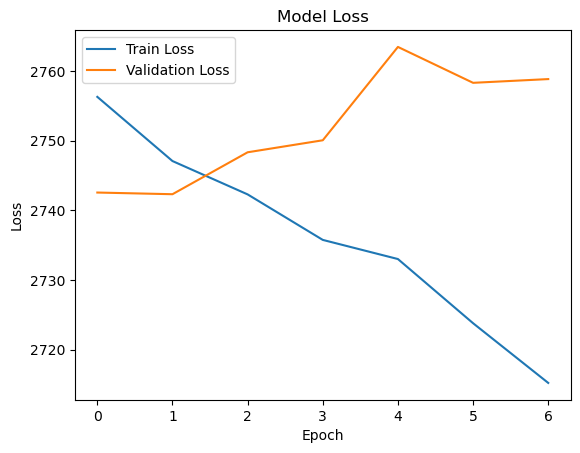

In [94]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Create predictions

In [97]:
# insert code here
# Create predictions on the test set
test_predictions = model.predict(X_test)

# Print some predictions alongside actual values
for i in range(10):  # Display the first 10 predictions
    print(f"Predicted: {test_predictions[i][0]:.2f}, Actual: {y_test[i]:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted: 162.85, Actual: 219.00
Predicted: 189.21, Actual: 70.00
Predicted: 140.01, Actual: 202.00
Predicted: 317.58, Actual: 230.00
Predicted: 93.50, Actual: 111.00
Predicted: 108.89, Actual: 84.00
Predicted: 250.29, Actual: 242.00
Predicted: 183.45, Actual: 272.00
Predicted: 85.68, Actual: 94.00
Predicted: 74.13, Actual: 96.00


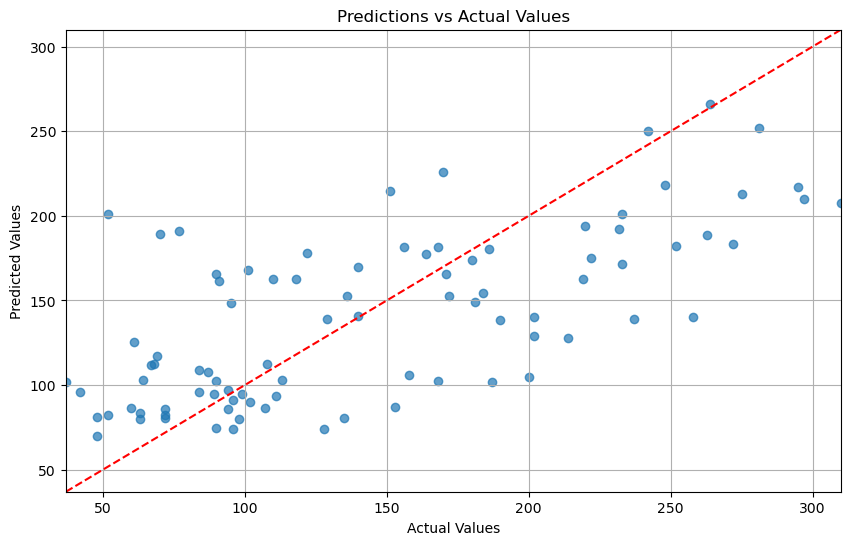

In [99]:
# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

### Evaluate the model

In [101]:
# insert code here
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3073.1919 - mae: 44.3707


In [103]:
# Print the evaluation results
print(f'Test Loss (MSE): {test_loss:.2f}')
print(f'Test MAE: {test_mae:.2f}')

Test Loss (MSE): 2905.51
Test MAE: 43.02


### Visualisation of cost

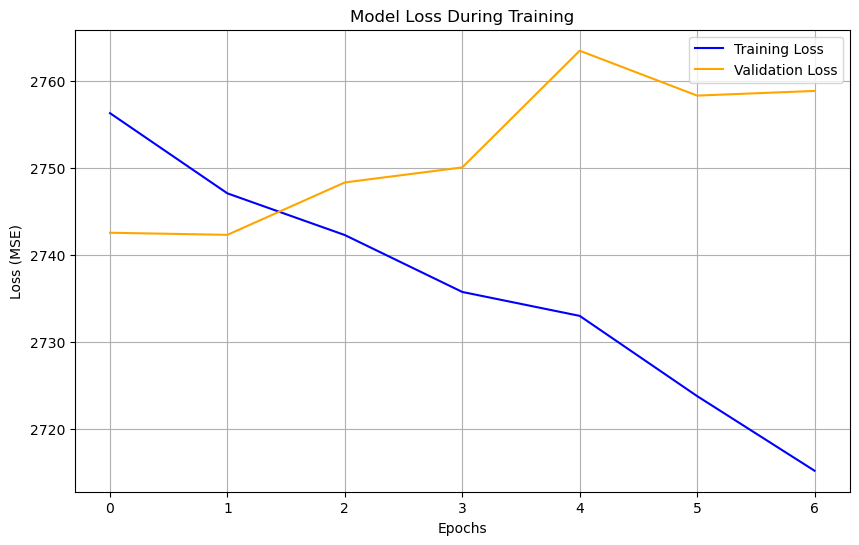

In [105]:
# insert code here
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

### Visualisation of residuals

In [107]:
# insert code here
# Create predictions on the test set
test_predictions = model.predict(X_test)

# Calculate residuals
residuals = y_test - test_predictions.flatten()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


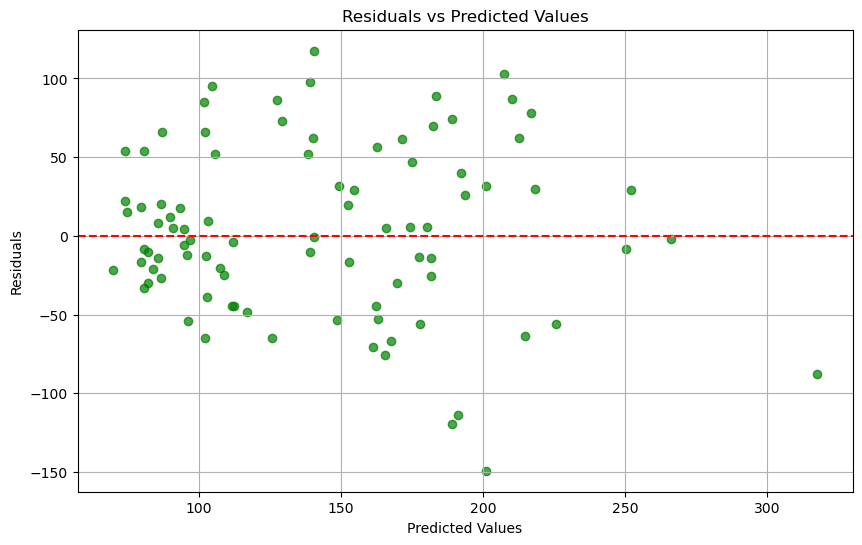

In [109]:
# Visualizing residuals
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



